<a href="https://colab.research.google.com/github/Inderdev07/car-price-prediction/blob/main/INDRO_CAR_PRICE_PRD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
cardf = pd.read_csv(r"https://raw.githubusercontent.com/Inderdev07/car-price-prediction/main/CarPrice_Assignment.csv")
cardf

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [47]:
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
cardf.values

array([[1, 3, 'alfa-romero giulia', ..., 21, 27, 13495.0],
       [2, 3, 'alfa-romero stelvio', ..., 21, 27, 16500.0],
       [3, 1, 'alfa-romero Quadrifoglio', ..., 19, 26, 16500.0],
       ...,
       [203, -1, 'volvo 244dl', ..., 18, 23, 21485.0],
       [204, -1, 'volvo 246', ..., 26, 27, 22470.0],
       [205, -1, 'volvo 264gl', ..., 19, 25, 22625.0]], dtype=object)

In [49]:
cardf.shape

(205, 26)

In [50]:
cardf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
cardf.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
cardf.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
cardf.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [55]:
cardf.enginetype

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: enginetype, Length: 205, dtype: object

In [56]:
cardf.enginesize

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [57]:
cardf.horsepower

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [58]:
cardf.fueltype

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

In [59]:
cardf.fueltype.replace(['gas','diesel'],[1,2],inplace = True)
cardf['fueltype'].unique()

array([1, 2])

In [60]:
cardf.enginetype.replace( ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'] , [1,2,3,4,5,6,7],inplace =True)
cardf["enginetype"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [61]:
cardf.enginesize.unique()
cardf.horsepower.unique()
cardf.price.unique()
cardf.fueltype.unique()

cardf.enginetype.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [62]:
car=cardf [['fueltype', 'enginetype','enginesize','horsepower','price']]
#car.drop(car.columns[0],axis=1,inplace=True)
car

,fueltype,enginetype,enginesize,horsepower,price
0,1,1,130,111,13495.0
1,1,1,130,111,16500.0
2,1,2,152,154,16500.0
3,1,3,109,102,13950.0
4,1,3,136,115,17450.0
...,...,...,...,...,...
200,1,3,141,114,16845.0
201,1,3,141,160,19045.0
202,1,2,173,134,21485.0
203,2,3,145,106,22470.0


In [63]:
car["price"]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [64]:
car["fueltype"].unique()

array([1, 2])

In [65]:
car.to_csv('car.csv',header=None)


In [66]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    205 non-null    int64  
 1   enginetype  205 non-null    int64  
 2   enginesize  205 non-null    int64  
 3   horsepower  205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 8.1 KB


In [67]:
car=car.values

In [68]:
car

array([[1.0000e+00, 1.0000e+00, 1.3000e+02, 1.1100e+02, 1.3495e+04],
       [1.0000e+00, 1.0000e+00, 1.3000e+02, 1.1100e+02, 1.6500e+04],
       [1.0000e+00, 2.0000e+00, 1.5200e+02, 1.5400e+02, 1.6500e+04],
       ...,
       [1.0000e+00, 2.0000e+00, 1.7300e+02, 1.3400e+02, 2.1485e+04],
       [2.0000e+00, 3.0000e+00, 1.4500e+02, 1.0600e+02, 2.2470e+04],
       [1.0000e+00, 3.0000e+00, 1.4100e+02, 1.1400e+02, 2.2625e+04]])

# Visualization

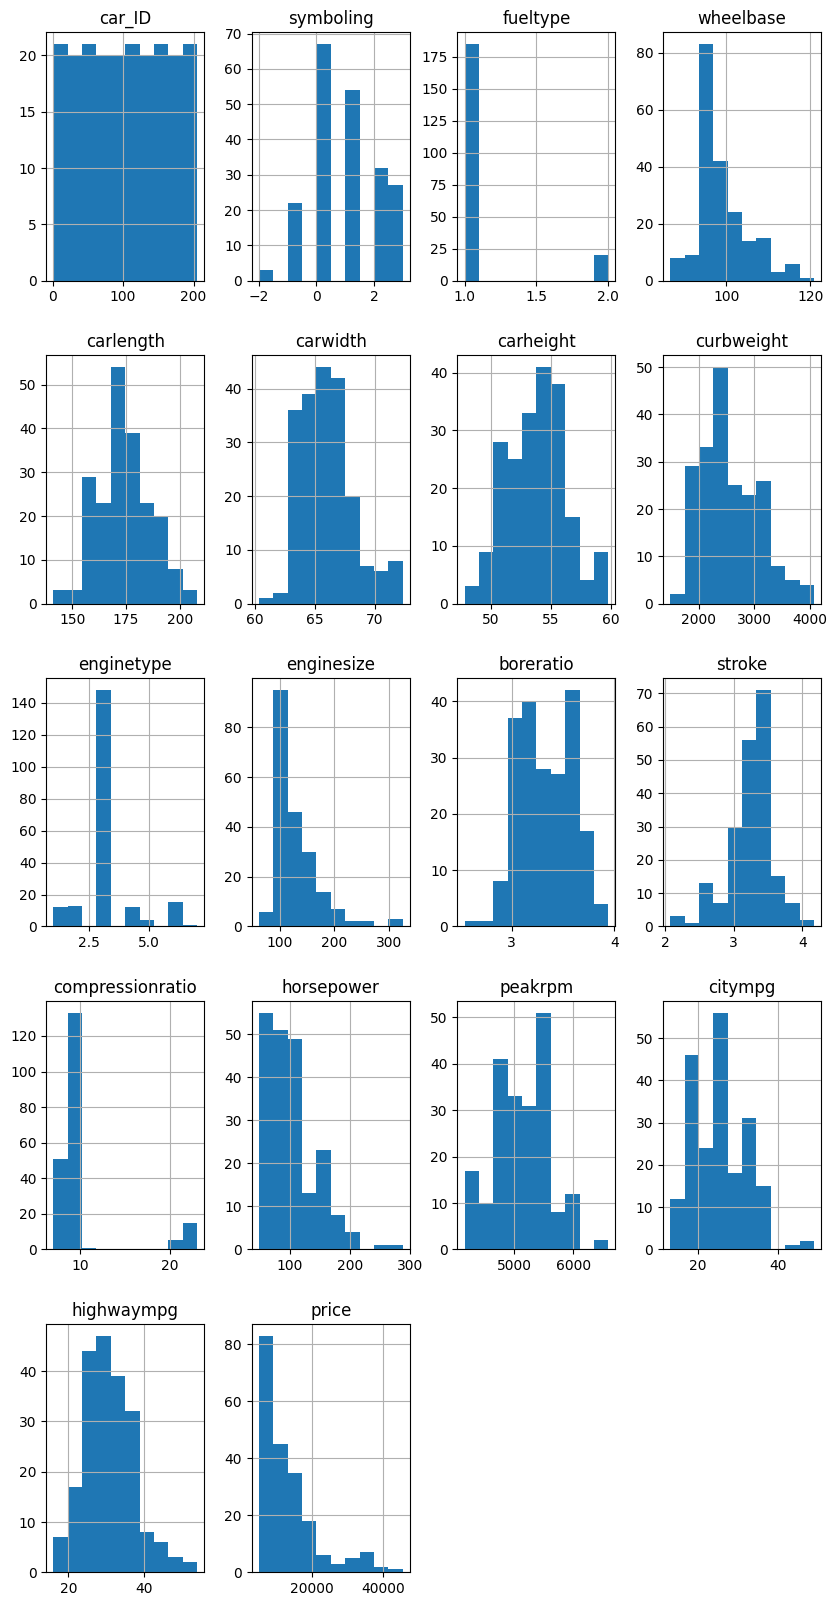

In [69]:
cardf.hist(figsize=(10,20))
plt.show()

# Machine Learning

In [70]:
X = cardf [['fueltype', 'enginetype','enginesize','horsepower']]
X.shape

(205, 4)

In [71]:
Y = cardf[['price']]
Y.shape

(205, 1)

In [72]:
X=X.values

In [73]:
Y=Y.values

## Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score



In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.20,shuffle=False,random_state=42)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)


x_train: (164, 4)
y_train: (164, 1)
x_test: (41, 4)
y_test: (41, 1)


In [76]:
Model1  = LinearRegression()

In [77]:
Model1

LinearRegression()

In [78]:
Model1.fit(X,Y)

LinearRegression()

In [79]:
prediction1=Model1.predict(x_test)
prediction1

array([[ 7135.44384793],
       [ 8913.13454963],
       [ 8913.13454963],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [15916.01162096],
       [11455.41972232],
       [11916.58295533],
       [11455.41972232],
       [11455.41972232],
       [11455.41972232],
       [20793.37595044],
       [20793.37595044],
       [20441.83588984],
       [19286.33605327],
       [ 8937.96491328],
       [ 9461.11384994],
       [ 8937.96491328],
       [ 9461.11384994],
       [ 9461.11384994],
       [10062.8931072 ],
       [10515.73403174],
       [ 9812.65391054],
       [ 9812.65391054],
       [14338.66371167],
       [10062.8931072 ],
       [ 9672.0378863 ],
       [15197.64567843],
       [15197.64567843],
       [15197.64567843],
       [15197.64567843],
       [17301.38043994],
       [17301.38043994],
       [15197.64567843],
       [18431.81423593],
       [19713.78249418],
       [18280.99678327],


In [80]:
error_score1=(r2_score(y_test,prediction1))*100
print(error_score1,"%", "errors")

47.232450710924354 % errors


In [81]:
Model1.predict([[1,1,130,111]])

array([[12540.42601453]])

## Decision Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

In [83]:
Model2  = DecisionTreeRegressor()

In [84]:
Model2

DecisionTreeRegressor()

In [85]:
Model2.fit(X,Y)

DecisionTreeRegressor()

In [86]:
prediction2=Model2.predict(x_test)
prediction2

array([ 7969.42857143,  9418.        ,  9418.        , 11415.66666667,
       11415.66666667, 11415.66666667, 11415.66666667, 11415.66666667,
       11415.66666667, 10270.5       , 10698.        , 10270.5       ,
       10270.5       , 10270.5       , 16278.        , 16278.        ,
       15690.        , 15750.        ,  7885.        ,  8221.66666667,
        7885.        ,  8221.66666667,  8221.66666667, 11670.        ,
        9995.        , 10787.5       , 10787.5       , 16293.75      ,
       11670.        , 12290.        , 16387.5       , 16387.5       ,
       16387.5       , 16387.5       , 18685.        , 18685.        ,
       16387.5       , 19045.        , 21485.        , 22470.        ,
       16387.5       ])

In [87]:
error_score2=(r2_score(y_test,prediction2))*100
print(error_score2,"%", "errors")

81.47517130118844 % errors


## Kneighbor Regressor

In [88]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

In [89]:
Model3=KNeighborsRegressor(n_neighbors=5,p=2, metric='minkowski')

In [90]:
Model3.fit(X,Y)

KNeighborsRegressor()

In [91]:
prediction3=Model3.predict(x_test)
prediction3

array([[ 7898.    ],
       [ 8661.6   ],
       [ 8661.6   ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10165.    ],
       [10426.    ],
       [ 7982.8   ],
       [10426.    ],
       [10426.    ],
       [10426.    ],
       [16768.8   ],
       [16768.8   ],
       [16239.    ],
       [16099.2   ],
       [ 6939.2   ],
       [ 8571.    ],
       [ 6939.2   ],
       [ 8571.    ],
       [ 8571.    ],
       [ 8749.4   ],
       [13328.    ],
       [10411.    ],
       [10411.    ],
       [16525.    ],
       [ 8749.4   ],
       [10411.    ],
       [16982.    ],
       [16982.    ],
       [16982.    ],
       [16982.    ],
       [18399.8334],
       [18399.8334],
       [16982.    ],
       [18154.8334],
       [27012.2   ],
       [18107.    ],
       [16982.    ]])

In [92]:
error_score3=(r2_score(y_test,prediction3))*100
print(error_score3,"%", "errors")

66.94680160102679 % errors


In [93]:
Model4=KNeighborsRegressor(n_neighbors=10,p=2, metric='minkowski')

In [94]:
Model4.fit(X,Y)

KNeighborsRegressor(n_neighbors=10)

In [95]:
prediction4=Model4.predict(x_test)
prediction4

array([[ 7868.3   ],
       [ 9318.8   ],
       [ 9318.8   ],
       [13077.9   ],
       [13077.9   ],
       [13077.9   ],
       [13077.9   ],
       [13077.9   ],
       [13077.9   ],
       [10881.4   ],
       [ 7994.4   ],
       [10881.4   ],
       [10881.4   ],
       [10881.4   ],
       [15749.1   ],
       [15749.1   ],
       [15362.    ],
       [14821.1   ],
       [ 7111.6   ],
       [ 8856.1   ],
       [ 7111.6   ],
       [ 8856.1   ],
       [ 8856.1   ],
       [ 8034.2   ],
       [12232.3   ],
       [ 9466.    ],
       [ 9466.    ],
       [15892.    ],
       [ 8034.2   ],
       [ 9466.    ],
       [14385.2   ],
       [14385.2   ],
       [14385.2   ],
       [14385.2   ],
       [18607.2167],
       [18607.2167],
       [14385.2   ],
       [18421.5167],
       [22959.9   ],
       [17267.5   ],
       [14385.2   ]])

In [96]:
error_score4=(r2_score(y_test,prediction4))*100
print(error_score4,"%", "errors")

64.70055000608576 % errors


In [97]:
Model5=KNeighborsRegressor(n_neighbors=50,p=1, metric='euclidean')

In [98]:
Model5.fit(X,Y)

KNeighborsRegressor(metric='euclidean', n_neighbors=50, p=1)

In [99]:
prediction5=Model5.predict(x_test)
prediction5

array([[ 7193.48   ],
       [11128.22   ],
       [11128.22   ],
       [15357.3    ],
       [15357.3    ],
       [15357.3    ],
       [15357.3    ],
       [15357.3    ],
       [15357.3    ],
       [10469.8    ],
       [ 8412.76   ],
       [10469.8    ],
       [10469.8    ],
       [10469.8    ],
       [19791.78334],
       [19791.78334],
       [18645.00334],
       [17474.10334],
       [ 7162.2    ],
       [10183.44   ],
       [ 7162.2    ],
       [10183.44   ],
       [10183.44   ],
       [ 7174.34   ],
       [10756.74   ],
       [10175.62   ],
       [10175.62   ],
       [13352.1    ],
       [ 7174.34   ],
       [10193.26   ],
       [14914.42   ],
       [14914.42   ],
       [14914.42   ],
       [14914.42   ],
       [15591.14334],
       [15591.14334],
       [14914.42   ],
       [16238.38334],
       [17319.48   ],
       [14099.94   ],
       [14914.42   ]])

In [100]:
error_score5=(r2_score(y_test,prediction5))*100
print(error_score5,"%", "errors")

38.22817855813159 % errors


In [101]:
#'fueltype', 'enginetype','enginesize','horsepower'
Model5.predict([[1,2,152,154]])

array([[17370.22334]])

# Comparison of different models

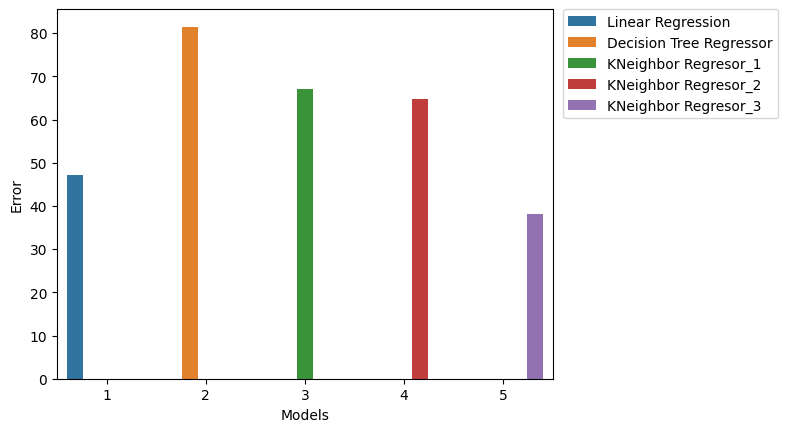

In [102]:
error=[error_score1,error_score2,error_score3,error_score4,error_score5]
num=[1,2,3,4,5]
models=["Linear Regression","Decision Tree Regressor","KNeighbor Regresor_1","KNeighbor Regresor_2","KNeighbor Regresor_3"]
a=sns.barplot(x=num,y=error,hue=models)
a.set(xlabel="Models",ylabel="Error")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Result

when we use Model5 i.e, "Model5=KNeighborsRegressor(n_neighbors=50,p=1, metric='euclidean')" then we get less errors i.e, "38.3277370472583 % errors". So we use this model for prediction the price of Car.

# Joblib

In [103]:
import joblib

In [104]:
joblib.dump(Model5 , 'car.joblib' )   #Kneighbor_5

['car.joblib']

In [105]:
import joblib
import numpy as np

newModel = joblib.load("car.joblib")
d1 = np.array([[4,78,2,100]])
print( newModel.predict(d1))
d1 = np.array([[3,100,1,200]])
print(newModel.predict(d1) )

[[7448.74]]
[[12317.72334]]
